In [1]:
# Michael Wasserstein
# Plot_Precipitation_Difference_2_runs.py
# 11/22/2024
# Script takes in WRF outputs for two different runs and then plots the precipitation as well as the precipitation difference for domain 3
# For a select time period defined by the user


####### Usage #########
# Conda environment - py37
# python /uufs/chpc.utah.edu/common/home/u1371671/WRF/Plotting_Scripts/Plot_Precipitation_Difference_2_runs_Select_Time_Period.py -r1 20 -r2 19 -p 12
# -r1 represents the run number you want to plot (typically the sensitivity i.e. no terrain)
# -r2 represents the run number you want to plot (typically the control)
# -p represents the path of the data, both runs should have same path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import glob
import wrf
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim, ALL_TIMES)
from netCDF4 import Dataset
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime
import os, sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u1371671/')
from map_script import *
import matplotlib as mpl
import pyart
from matplotlib.colors import ListedColormap


######## User input arguments #############
# import argparse
# parser = argparse.ArgumentParser(description="Specify WRF runs and their paths.")

# parser.add_argument("-r1", "--run1", help="WRF run 1 of interest. The sensitivity")
# parser.add_argument("-r2", "--run2", help="WRF run 2 of interest. Typically the control")
# parser.add_argument("-p", "--path", help="Wrf path - where is data (1 or 2")

# args = parser.parse_args()

# Get user inputs
run1 = '22'
run2 = '19'
path = 12

# User input start and end time
start_time = datetime.datetime(2019,3,22,20,)
end_time = datetime.datetime(2019,3,23,0,)
print('Plotting data for run', run1, 'and', run2, 'between', start_time, end_time)

# TIme information based on user inputs
start_time_str = datetime.datetime.strftime(start_time, '%b %-d, %Y %H:%M UTC')
end_time_str = datetime.datetime.strftime(end_time, '%b %-d, %Y %H:%M UTC')

start_time_save = datetime.datetime.strftime(start_time, '%Y%m%d%H%M')
end_time_save = datetime.datetime.strftime(end_time, '%Y%m%d%H%M')

# Format runs with leading zeros
run_number1 = '{}'.format(run1).zfill(2)
run_number2 = '{}'.format(run2).zfill(2)

# paths for data
if path ==1:
    base_path = '/uufs/chpc.utah.edu/common/home/steenburgh-group12/michael/wrf/'
else:
    base_path = '/uufs/chpc.utah.edu/common/home/steenburgh-group12/michael/wrf{}/'.format(path)
    


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Plotting data for run 22 and 19 between 2019-03-22 20:00:00 2019-03-23 00:00:00


In [2]:
#################################### Run 1 Information #########################
# Path where data is stored
WRF_path = base_path + 'wrf_runs/wrf_{}/run/'.format(run_number1)

# paths for saving fig
Fig_dir1 = '/uufs/chpc.utah.edu/common/home/u1371671/WRF/Figures_{}/wrf_{}/'.format(path, run_number1)

# load in all the wrf output data files
data_files_d03_run1 = glob.glob(WRF_path + '*wrfout_d03*') # for the 3rd
data_files_d03_run1.sort()

# Load in all wrf files as datasets
wrflist_d03_run1 = [Dataset(data_files_d03_run1[i]) for i in range(len(data_files_d03_run1))]

# Get the useful data
ter_d03_run1 = getvar(wrflist_d03_run1, "ter", timeidx = 0)
LANDMASK_d03_run1 = getvar(wrflist_d03_run1, "LANDMASK", timeidx = 0)
RAINNC_d03_run1 = getvar(wrflist_d03_run1, "RAINNC", timeidx = ALL_TIMES) # only need NC cause you're not using convective
cart_proj_run1 = wrf.get_cartopy(var = None, wrfin=wrflist_d03_run1, timeidx = -1)

# Extract a slice of the rain data corresponding with the times to plot
RAINNC_d03_run1_slice = RAINNC_d03_run1.sel(Time = slice(start_time, end_time))

# Subtract hour 0 from the end time to get precipitation accumulation over the period of intereset
RAINNC_d03_run1_accum = RAINNC_d03_run1_slice[-1] - RAINNC_d03_run1_slice[0]

# Extract geobounds (should be the same for both runs you're comparign)
geobounds = wrf.geo_bounds(wrfin=wrflist_d03_run1[0])
bottom_latitude_d03 = geobounds.bottom_left.lat
left_longitude_d03 = geobounds.bottom_left.lon
top_latitude_d03 = geobounds.top_right.lat
right_longitude_d03 = geobounds.top_right.lon

/scratch/local/u1371671/2593419/ipykernel_2169102/906110456.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('pyart_HomeyerRainbow')
/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/Radar_env_2/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewdiths'
  result = super().contour(*args, **kwargs)


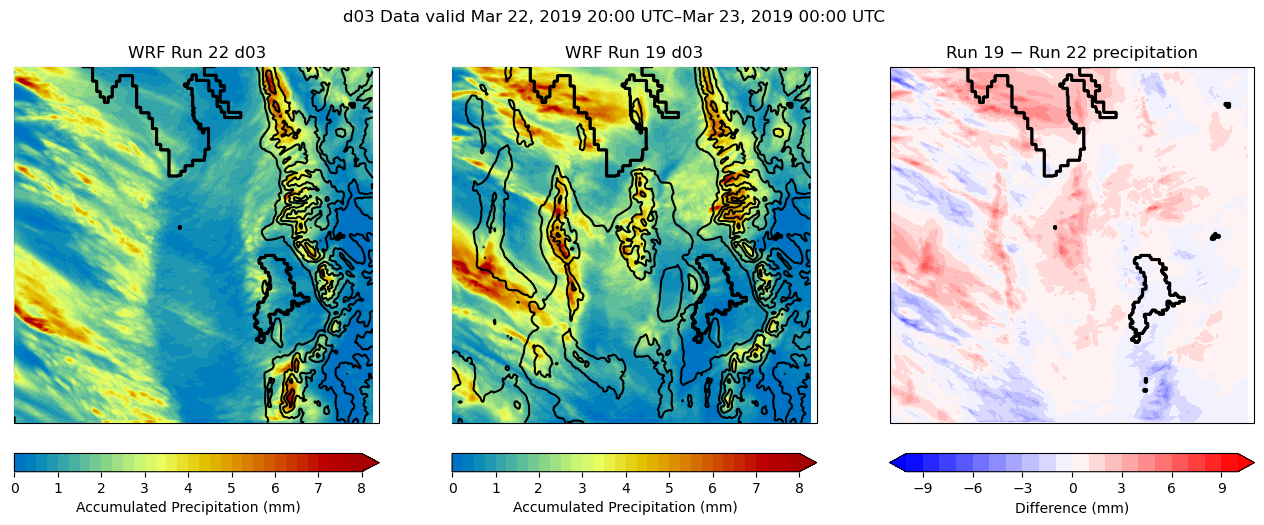

In [3]:
#################################### Run 2 Information #########################
# Path where data is stored
WRF_path = base_path + 'wrf_runs/wrf_{}/run/'.format(run_number2)

# paths for saving fig
Fig_dir2 = '/uufs/chpc.utah.edu/common/home/u1371671/WRF/Figures_{}/wrf_{}/'.format(path, run_number2)

# load in all the wrf output data files
data_files_d03_run2 = glob.glob(WRF_path + '*wrfout_d03*') # for the 3rd
data_files_d03_run2.sort()

# Load in all wrf files as datasets
wrflist_d03_run2 = [Dataset(data_files_d03_run2[i]) for i in range(len(data_files_d03_run2))]

# Get the useful data
ter_d03_run2 = getvar(wrflist_d03_run2, "ter", timeidx = 0)
LANDMASK_d03_run2 = getvar(wrflist_d03_run2, "LANDMASK", timeidx = 0)
RAINNC_d03_run2 = getvar(wrflist_d03_run2, "RAINNC", timeidx = ALL_TIMES)
cart_proj_run2 = wrf.get_cartopy(var = None, wrfin=wrflist_d03_run2, timeidx = -1)

# Get information about times
init_time = wrflist_d03_run2[0].SIMULATION_START_DATE
init_time = datetime.datetime.strptime(init_time, '%Y-%m-%d_%H:%M:%S')
init_time_str = datetime.datetime.strftime(init_time, '%b %-d, %Y %H:%M UTC')

# Extract a slice of the rain data corresponding with the times to plot
RAINNC_d03_run2_slice = RAINNC_d03_run2.sel(Time = slice(start_time, end_time))

# Subtract hour 0 from the end time to get precipitation accumulation over the period of intereset
RAINNC_d03_run2_accum = RAINNC_d03_run2_slice[-1] - RAINNC_d03_run2_slice[0]

# calculate the precipitaiton difference for plotting
precip_diff = RAINNC_d03_run2_accum.values - RAINNC_d03_run1_accum.values

################################ Plot Figure #######################################
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,facecolor = 'white',edgecolor = 'k', figsize = (16, 8), subplot_kw = {'projection' : cart_proj_run2})

# Plot settings
levels = np.arange(0,8.1,0.25) # Specify levels - this could take some work
cmap = matplotlib.cm.get_cmap('pyart_HomeyerRainbow')
pad = 0.05
################################ ax1 - run1 d03 ############################################
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
ax1.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# d03 set limits
ax1.set_extent([left_longitude_d03, right_longitude_d03, bottom_latitude_d03, top_latitude_d03])

# Plot PRecipitation
plot = ax1.contourf(RAINNC_d03_run1.XLONG.values, RAINNC_d03_run1.XLAT.values, RAINNC_d03_run1_accum.values, cmap = cmap, 
                     levels = levels, extend = 'max',zorder = 20,transform=ccrs.PlateCarree(),)

# Add terrain contours
ax1.contour(ter_d03_run1.XLONG.values, ter_d03_run1.XLAT.values, ter_d03_run1.values, colors = 'k',
           levels = np.arange(1000,4000,500), transform=ccrs.PlateCarree(),zorder = 21, linewdiths = 0.5)

# ax1.contour(ter_d03_run2.XLONG.values, ter_d03_run2.XLAT.values, ter_d03_run2.values, colors = 'white',
#            levels = np.arange(1000,4000,500), transform=ccrs.PlateCarree(),zorder = 20, linewdiths = 0.00002)

# Add lake to  map
ax1.contour(LANDMASK_d03_run1.XLONG.values, LANDMASK_d03_run1.XLAT.values, LANDMASK_d03_run1.values, colors = 'black', levels = np.arange(0.0,0.6,0.5),
             transform = ccrs.PlateCarree(), zorder = 23, linewidths = 2)

# Title
ax1.set_title(f'WRF Run {run1} d03')

# Add colorbar
plt.colorbar(plot, ax = ax1, orientation = 'horizontal', label = 'Accumulated Precipitation (mm)', pad = pad)


# ################################ ax2 - run2 d03 ############################################
ax2.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
ax2.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
ax2.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# d03 set limits
ax2.set_extent([left_longitude_d03, right_longitude_d03, bottom_latitude_d03, top_latitude_d03])

# Plot PRecipitation
plot = ax2.contourf(RAINNC_d03_run2.XLONG.values, RAINNC_d03_run2.XLAT.values, RAINNC_d03_run2_accum.values, cmap = cmap, 
                     levels = levels, extend = 'max',zorder = 20,transform=ccrs.PlateCarree(),)

# Add terrain contours
ax2.contour(ter_d03_run2.XLONG.values, ter_d03_run2.XLAT.values, ter_d03_run2.values, colors = 'k',
           levels = np.arange(1000,4000,500), transform=ccrs.PlateCarree(),zorder = 21, linewdiths = 0.5)

# Add lake to  map
ax2.contour(LANDMASK_d03_run2.XLONG.values, LANDMASK_d03_run2.XLAT.values, LANDMASK_d03_run2.values, colors = 'black', levels = np.arange(0.0,0.6,0.5),
             transform = ccrs.PlateCarree(), zorder = 23, linewidths = 2)

# Title
ax2.set_title(f'WRF Run {run2} d03')

# Add colorbar
plt.colorbar(plot, ax = ax2, orientation = 'horizontal', label = 'Accumulated Precipitation (mm)', pad = pad)


# ################################ ax3 - difference d03 ############################################
ax3.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
ax3.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
ax3.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# # d03 set limits
ax3.set_extent([left_longitude_d03, right_longitude_d03, bottom_latitude_d03, top_latitude_d03])


# # Plot precipitation difference
plot = ax3.contourf(RAINNC_d03_run2.XLONG.values, RAINNC_d03_run2.XLAT.values, precip_diff, cmap = 'bwr', 
                    transform=ccrs.PlateCarree(), levels = np.arange(-10,10.2,1), extend = 'both')

# Add lake to  map
ax3.contour(LANDMASK_d03_run2.XLONG.values, LANDMASK_d03_run2.XLAT.values, LANDMASK_d03_run2.values, colors = 'black', levels = np.arange(0.0,0.6,0.5),
             transform = ccrs.PlateCarree(), zorder = 23, linewidths = 2)

# ax3.contour(ter_d03_run2.XLONG.values, ter_d03_run2.XLAT.values, ter_d03_run2.values, colors = 'white',
#            levels = np.arange(1000,4000,500), transform=ccrs.PlateCarree(),zorder = 20, linewdiths = 0.00002)

# # Title
ax3.set_title(f'Run {run2} \u2212 Run {run1} precipitation')

cb = plt.colorbar(plot, ax = ax3, orientation = 'horizontal', label = 'Difference (mm)', pad = pad)


# Add a suptitle for the whole plot
plt.suptitle(f'd03 Data valid {start_time_str}\u2013{end_time_str}', y = 0.78)

# Save show and close
plt.savefig(Fig_dir1 + f'Precip_Diff_WRF{run2}_WRF{run1}_d03_{start_time_save}_{end_time_save}.png', dpi = 300, bbox_inches = 'tight')
plt.savefig(Fig_dir2 + f'Precip_Diff_WRF{run2}_WRF{run1}_d03_{start_time_save}_{end_time_save}.png', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.close()

# domain 2

In [4]:
#################################### Run 1 Information #########################
WRF_path = base_path + 'wrf_runs/wrf_{}/run/'.format(run_number1)

# paths for saving fig
Fig_dir1 = '/uufs/chpc.utah.edu/common/home/u1371671/WRF/Figures_{}/wrf_{}/'.format(path, run_number1)

# load in all the wrf output data files
data_files_d02_run1 = glob.glob(WRF_path + '*wrfout_d02*') # for the 3rd
data_files_d02_run1.sort()

# Load in all wrf files as datasets
wrflist_d02_run1 = [Dataset(data_files_d02_run1[i]) for i in range(len(data_files_d02_run1))]

# Get the useful data
ter_d02_run1 = getvar(wrflist_d02_run1, "ter", timeidx = 0)
LANDMASK_d02_run1 = getvar(wrflist_d02_run1, "LANDMASK", timeidx = 0)
RAINNC_d02_run1 = getvar(wrflist_d02_run1, "RAINNC", timeidx = ALL_TIMES)
cart_proj_run1 = wrf.get_cartopy(var = None, wrfin=wrflist_d02_run1, timeidx = -1)

# Extract a slice of the rain data corresponding with the times to plot
RAINNC_d02_run1_slice = RAINNC_d02_run1.sel(Time = slice(start_time, end_time))

# Subtract hour 0 from the end time to get precipitation accumulation over the period of intereset
RAINNC_d02_run1_accum = RAINNC_d02_run1_slice[-1] - RAINNC_d02_run1_slice[0]

# Extract geobounds (should be the same for both runs you're comparign)
geobounds = wrf.geo_bounds(wrfin=wrflist_d02_run1[0])
bottom_latitude_d02 = geobounds.bottom_left.lat
left_longitude_d02 = geobounds.bottom_left.lon
top_latitude_d02 = geobounds.top_right.lat
right_longitude_d02 = geobounds.top_right.lon

/uufs/chpc.utah.edu/common/home/u1371671/software/pkg/miniconda3/envs/Radar_env_2/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewdiths'
  result = super().contour(*args, **kwargs)


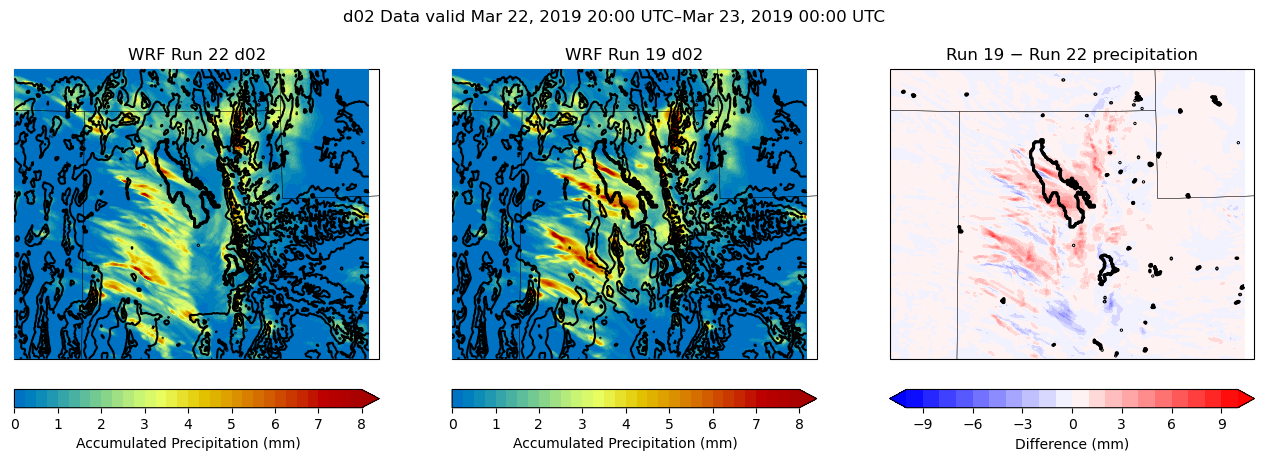

In [5]:
#################################### Run 2 Information #########################
WRF_path = base_path + 'wrf_runs/wrf_{}/run/'.format(run_number2)

# paths for saving fig
Fig_dir2 = '/uufs/chpc.utah.edu/common/home/u1371671/WRF/Figures_{}/wrf_{}/'.format(path, run_number2)

# load in all the wrf output data files
data_files_d02_run2 = glob.glob(WRF_path + '*wrfout_d02*') # for the 3rd
data_files_d02_run2.sort()

# Load in all wrf files as datasets
wrflist_d02_run2 = [Dataset(data_files_d02_run2[i]) for i in range(len(data_files_d02_run2))]

# Get the useful data
ter_d02_run2 = getvar(wrflist_d02_run2, "ter", timeidx = 0)
LANDMASK_d02_run2 = getvar(wrflist_d02_run2, "LANDMASK", timeidx = 0)
RAINNC_d02_run2 = getvar(wrflist_d02_run2, "RAINNC", timeidx = ALL_TIMES)
cart_proj_run2 = wrf.get_cartopy(var = None, wrfin=wrflist_d02_run2, timeidx = -1)

# Get information about times
init_time = wrflist_d02_run2[0].SIMULATION_START_DATE
init_time = datetime.datetime.strptime(init_time, '%Y-%m-%d_%H:%M:%S')
init_time_str = datetime.datetime.strftime(init_time, '%b %-d, %Y %H:%M UTC')

# Extract a slice of the rain data corresponding with the times to plot
RAINNC_d02_run2_slice = RAINNC_d02_run2.sel(Time = slice(start_time, end_time))

# Subtract hour 0 from the end time to get precipitation accumulation over the period of intereset
RAINNC_d02_run2_accum = RAINNC_d02_run2_slice[-1] - RAINNC_d02_run2_slice[0]

# calculate the precipitaiton difference
precip_diff = RAINNC_d02_run2_accum.values - RAINNC_d02_run1_accum.values

################################ Plot Figure #######################################
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,facecolor = 'white',edgecolor = 'k', figsize = (16, 8), subplot_kw = {'projection' : cart_proj_run2})

# Plot settings
pad = 0.05
################################ ax1 - run1 d02 ############################################
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
ax1.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
ax1.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# d02 set limits
ax1.set_extent([left_longitude_d02, right_longitude_d02, bottom_latitude_d02, top_latitude_d02])

# Plot PRecipitation
plot = ax1.contourf(RAINNC_d02_run1.XLONG.values, RAINNC_d02_run1.XLAT.values, RAINNC_d02_run1_accum.values, cmap = cmap, 
                     levels = levels, extend = 'max',zorder = 20,transform=ccrs.PlateCarree(),)

# Add terrain contours
ax1.contour(ter_d02_run1.XLONG.values, ter_d02_run1.XLAT.values, ter_d02_run1.values, colors = 'k',
           levels = np.arange(1000,4000,500), transform=ccrs.PlateCarree(),zorder = 21, linewdiths = 0.5)

# Add lake to  map
ax1.contour(LANDMASK_d02_run1.XLONG.values, LANDMASK_d02_run1.XLAT.values, LANDMASK_d02_run1.values, colors = 'black', levels = np.arange(0.0,0.6,0.5),
             transform = ccrs.PlateCarree(), zorder = 23, linewidths = 2)

# Title
ax1.set_title(f'WRF Run {run1} d02')

# Add colorbar
plt.colorbar(plot, ax = ax1, orientation = 'horizontal', label = 'Accumulated Precipitation (mm)', pad = pad)


# ################################ ax2 - run2 d02 ############################################
ax2.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
ax2.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
ax2.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# d02 set limits
ax2.set_extent([left_longitude_d02, right_longitude_d02, bottom_latitude_d02, top_latitude_d02])

# Plot PRecipitation
plot = ax2.contourf(RAINNC_d02_run2.XLONG.values, RAINNC_d02_run2.XLAT.values, RAINNC_d02_run2_accum.values, cmap = cmap, 
                     levels = levels, extend = 'max',zorder = 20,transform=ccrs.PlateCarree(),)

# Add terrain contours
ax2.contour(ter_d02_run2.XLONG.values, ter_d02_run2.XLAT.values, ter_d02_run2.values, colors = 'k',
           levels = np.arange(1000,4000,500), transform=ccrs.PlateCarree(),zorder = 21, linewdiths = 0.5)

# Add lake to  map
ax2.contour(LANDMASK_d02_run2.XLONG.values, LANDMASK_d02_run2.XLAT.values, LANDMASK_d02_run2.values, colors = 'black', levels = np.arange(0.0,0.6,0.5),
             transform = ccrs.PlateCarree(), zorder = 23, linewidths = 2)

# Title
ax2.set_title(f'WRF Run {run2} d02')

# Add colorbar
plt.colorbar(plot, ax = ax2, orientation = 'horizontal', label = 'Accumulated Precipitation (mm)', pad = pad)


# ################################ ax3 - difference d02 ############################################
ax3.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5, zorder = 100)
ax3.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.25, zorder = 100)
ax3.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.25, zorder = 100)

# # d02 set limits
ax3.set_extent([left_longitude_d02, right_longitude_d02, bottom_latitude_d02, top_latitude_d02])

# # Plot precipitation difference
plot = ax3.contourf(RAINNC_d02_run2.XLONG.values, RAINNC_d02_run2.XLAT.values, precip_diff, cmap = 'bwr', 
                    transform=ccrs.PlateCarree(), levels = np.arange(-10,10.2,1), extend = 'both')

# Add lake to  map
ax3.contour(LANDMASK_d02_run2.XLONG.values, LANDMASK_d02_run2.XLAT.values, LANDMASK_d02_run2.values, colors = 'black', levels = np.arange(0.0,0.6,0.5),
             transform = ccrs.PlateCarree(), zorder = 23, linewidths = 2)

# # Title
ax3.set_title(f'Run {run2} \u2212 Run {run1} precipitation')

cb = plt.colorbar(plot, ax = ax3, orientation = 'horizontal', label = 'Difference (mm)', pad = pad)


# Add a suptitle for the whole plot
plt.suptitle(f'd02 Data valid {start_time_str}\u2013{end_time_str}', y = 0.70)

# Save show and close
plt.savefig(Fig_dir1 + f'Precip_Diff_WRF{run2}_WRF{run1}_d02_{start_time_save}_{end_time_save}.png', dpi = 300, bbox_inches = 'tight')
plt.savefig(Fig_dir2 + f'Precip_Diff_WRF{run2}_WRF{run1}_d02_{start_time_save}_{end_time_save}.png', dpi = 300, bbox_inches = 'tight')
plt.show()
plt.close()